<div>
<img src="logo.png", width=100, ALIGN="left">
<center>
<h1>Mini Projets 2019-2020 (Info 232)</h1>
Isabelle Guyon <br>
info232@chalearn.org <br>
</center>
<span style="color:red"> <h1> 2 . Pandas </h1> </span>
    
We have now a dataset of pictures of REAL apples and bananas, preprocessed in 4 different representations:
- one with only 2 features (<b>R</b>edness and <b>E</b>longation) called <b>RE_data.csv</b>
- one with only 21 features (<b>C</b>olor and <b>S</b>hape features) called <b>CS_data.csv</b>
- one with 14580 features (all pixels of 81x69x3 <b>raw</b> images) called <b>RAW_data.csv</b>
- one with 3072 features (all pixels of 32x32x3 <b>crop</b>ped images) called <b>CROP_data.csv</b>.

We will compare the performances of various classifiers on those 4 datasets. Thus, we are going to start doing "real" POM: Probability, Optimization, and Modeling. We will proceed in a "greedy" way, eliminating some non promising avenues as we go, and not revisiting them for the moment:

1. Which dataset version should we keep? Should we or not scale variables (using variable standardization)?
2. Which learning machine of a standard toolkit (scikit-learn) is most promising?

</div>
<div style="background:#FFFFAA">
    
 This TP gives you 5 points if you answer well ALL 5 questions. If you cannot fisnish, get help by attending the Wednesday session.
    
<span style="color:red"> <b>Save your notebook often with menu File + Save and Checkpoint.</b>
<br> <b>Before you push your homework to your GitHub repo, use  Kernel + Restart and Run all.</b>
</span>
    </div>
    

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Add path to the sample code so the notebook finds it:
code_dir = 'code/'                        
from sys import path; path.append(code_dir)
from utilities import *
# Import code that checks your answers
from checker import check 
# Disable some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# Step 1: Select data representation
Which dataset version should we keep? Should we do or not a variable standardization?

### Question 0: Examine the data directory
Go to the directory `mini-dataset/`. You should find four data files ending with `.csv`. In an editor, open `RL_data.csv` or another of the data files to see how it looks like. The dataset is formatted in the CSV format (comma separated file). The examples are in lines and the features are separated by commas. The first line is the header. 

Examine all 4 datasets and note the number of lines and columns. Notice that they all have a different number of features but the same number of examples. 

It is somewhat easier to write a Python program to do this work for you. Check how the function `check_datasets` is written by typing `??check_datasets` in a new cell. Verify with an editor that this is the same code that is found in the directory `code/` in the file `utilities.py`. 

In [2]:
# List the datasets
data_dir = './mini-dataset/'
data_list = ls(data_dir + '*_data.csv')
data_list

['./mini-dataset/CROP_data.csv',
 './mini-dataset/CS_data.csv',
 './mini-dataset/RAW_data.csv',
 './mini-dataset/RE_data.csv']

In [3]:
# Check the dataset sizes
check_datasets(data_list)

,Dataset,num. examples,num. features,num. apples,num. bananas
0,CROP,491,3073,333,158
1,CS,491,22,333,158
2,RAW,491,14581,333,158
3,RE,491,3,333,158


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Show the code of check_datasets.</b>

In [4]:
??check_datasets

### Question 1: Load and visualize data with Pandas (review)
In previous classes we have have started using `Numpy arrays`and `Pandas dataframes`. We now explore Pandas a little bit further. Pandas dataframes are also arrays, but a different kind of python object that Numpy arrays. They have more properties, supporting fancy database functions and having quite a few display functions and nice simple summary statistics, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">check the documentation</a>. Learning about Pandas will help a lot the <i>visualization binome</i>.

First, you will perform these steps:
* Call to UNIX command `!head ./mini-dataset/RE_data.csv` to view the first few lines of the file. The character `!` allows you to "escape" from the Jupyter notebook to the UNIX shell.
* Load `RL_data.csv` as a pandas dataframe called `df`. Show the first few lines using the method `head`.
* Compute simple statistics using the method `describe`.
* Show the heat map. If you do not remember from the previous TP, think of using a search engine and type the keywords: "pandas heatmap". I found <a href="https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe">this post</a>, for instance. 
* Create a new data frame called `df_scaled` obtained by standardizing the columns of `df`. In the previous TP we used the method `StandardScaler` of `sklearn.preprocessing`. Notice that you can also simply compute the mean of `df` with `df.mean()` and the standard deviation with `df.std()`, then in one line of code get `df_scaled` by performing algebraic operations on dataframes!
* We actually doe NOT want to standardize the <b>last column</b> (the class label). Make sure the last column of  `df_scaled` has the ORIGINAL label values +1 or -1.

Then, the question you should answer to complete this section is: what are the mean and standard deviation of the lines and the columns of the `redness` and `elongation` features before and after standardization?

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Put here your call to the UNIX command "head".</b>

In [5]:
!head ./mini-dataset/RE_data.csv

redness,elongation,fruit
8.429611650485437,1.4032012759326986,1.0
42.89607843137255,1.7032009898154288,1.0
56.354066985645936,1.5508105645577395,1.0
-10.528846153846153,1.7773426521360935,1.0
-17.131386861313867,2.047174441534352,1.0
36.041666666666664,1.4139561143744013,1.0
34.744932432432435,1.2379057682280559,1.0
1.8179190751445087,1.0839275628229141,1.0
3.34106529209622,1.0972000640347488,1.0


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Read file RE_data.csv as a dataframe and call it "df".</b>

In [6]:
df = pd.read_csv(os.path.join(data_dir, 'RE_data.csv'))
df.head()

,redness,elongation,fruit
0,8.429612,1.403201,1.0
1,42.896078,1.703201,1.0
2,56.354067,1.550811,1.0
3,-10.528846,1.777343,1.0
4,-17.131387,2.047174,1.0


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Show descriptive statistics with the method "describe".</b>

In [7]:
df.describe()

,redness,elongation,fruit
count,491.000000,491.000000,491.000000
mean,17.863426,1.468878,0.356415
std,21.805386,0.521078,0.935280
min,-47.045455,1.000000,-1.000000
25%,3.895620,1.161664,-1.000000
50%,14.380952,1.300111,1.000000
75%,33.848108,1.598103,1.000000
max,100.364865,5.231697,1.000000


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Show the heat map of "df".</b>

In [8]:
df.round(2).style.background_gradient(cmap='Blues')

,redness,elongation,fruit
0,8.43,1.4,1
1,42.9,1.7,1


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Standardize the columns of "df", EXCEPT THE LAST ONE.</b>

In [9]:
df_scaled = (df-df.mean())/df.std()
df_scaled.iloc[:,-1] = df.iloc[:, -1]

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Your final answers to question 1. </b> What are the mean and standard deviation of the lines and the columns of the `redness` and `elongation` features before and after standardization?

In [10]:
question = 1
score = 0
# Put your answers to question 1 here
redness_mean_before, elongation_mean_before, label_mean_before = df.mean()
redness_std_before, elongation_std_before, label_std_before = df.std()
redness_mean_after, elongation_mean_after, label_mean_after = df_scaled.mean()
redness_std_after, elongation_std_after, label_std_after = df_scaled.std()

# This is the checker code, keep it
answer = redness_mean_before+elongation_mean_before+label_mean_before
answer += redness_std_before+elongation_std_before+label_std_before
answer -= redness_mean_after+elongation_mean_after+label_mean_after
answer -= redness_std_after+elongation_std_after+label_std_after
score += check(answer, question)

39.65876749424191
39.6587674942419


### Question 2: Write a function to standardize data
It is often useful to `standardize` the columns of the data matrix to put all values in a similar scale, so to facilitate re-using this operation, write a function that takes as input a data frame `df` containing a dataset and returns a dataframe `df_scaled` with the columns standardized <b>EXCEPT THE TARGET VALUES</b> of the last column (use your answers to the previous section). Use this template for your code:

    def standardize_df(df):
    '''Standardize all the columns except the last one (target values).'''
    # YOUR CODE HERE
    return df_scaled
    
Test your function with the same dataframe as in the previous questions and use the methods `head` and `describe` to verify that all the columns are standardized, except the last one. Notice that, due to machine precision, you may not get exactly mean=0 and std=1.

In [11]:
# Replace by your own code:
def standardize_df(df):
    '''Standardize all the columns except the last one (target values).'''
    df_scaled = (df-df.mean())/df.std()
    df_scaled.iloc[:, -1] = df.iloc[:, -1]
    return df_scaled

df_scaled2 = standardize_df(df)
df_scaled2.head()

,redness,elongation,fruit
0,-0.432637,-0.126039,1.0
1,1.148003,0.449690,1.0
2,1.765190,0.157238,1.0
3,-1.302076,0.591975,1.0
4,-1.604870,1.109809,1.0


In [12]:
df_scaled2.describe()

,redness,elongation,fruit
count,4.910000e+02,4.910000e+02,491.000000
mean,-1.085350e-16,-8.266752e-16,0.356415
std,1.000000e+00,1.000000e+00,0.935280
min,-2.976736e+00,-8.998221e-01,-1.000000
25%,-6.405668e-01,-5.895726e-01,-1.000000
50%,-1.597070e-01,-3.238798e-01,1.000000
75%,7.330612e-01,2.479972e-01,1.000000
max,3.783535e+00,7.221221e+00,1.000000


In [13]:
# This is the checker code, keep it
question = 2
answer = (df_scaled == df_scaled2).all().all()
score += check(answer, question)

True
1


### Question 3: Select the best representation
We are now going to loop over all datasets and compare the performance of our baseline method (one nearest neighbor classifier) with and without variable scaling. 

First you will perform these steps (with some help):
* Import `KNeighborsClassifier` from the scikit-learn library (`sklearn`) and instanciate a one nearest neighbor classifier that you will call `sklearn_model`. Also import the `balanced_accuracy_score` and name it `sklearn_metric`.
* Call `df_cross_validate(df, sklearn_model, sklearn_metric)` and collect the results, then print the training and test performance and their error bars. <b>Tip:</b> look at the bottom of the code using `??df_cross_validate` to get an idea on how to print the results. 
* Create:
 * a list containing all the dataset dataframes and call it `all_data_df`
 * a list containg all the dataset names and call it `data_name`. 
* Run the function `systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)` and display the results.
* <b>Create a list</b> containing all the SCALED datasets (variables standardized) and call it `all_scaled_data_df`.
* Run again `systematic_data_experiment` on `all_scaled_data_df` and display the results.
* Fuse the results of the two previous question by creating a dataframe called `joint_results`. Assign `result_scaling.perf_te` to a column called `'SCALED'` and `result_noscaling.perf_te` to a column called `'NOT SCALED'`. Display the results.
* Visualize `joint_results` with a histogram. Check <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html">this documentation</a>.

Then the questions you should answer are:
* Does re-scaling variables always help?
* Is which case does it help most?

Try to reason why this might be.

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Make necessary changes; USE THE DOCUMENTATION OF SCIKIT LEARN (do not copy on your neighbor).</b> 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric # Replace that by balanced accuracy 
sklearn_model = KNeighborsClassifier(n_neighbors=1)

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Collect the results of df_cross_validate(df, sklearn_model, sklearn_metric).</b> 

In [15]:
??df_cross_validate
p_te, s_te, p_tr, s_tr  = df_cross_validate(df, sklearn_model, sklearn_metric)

metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

AVERAGE TRAINING BALANCED_ACCURACY_SCORE +- STD: 0.64 +- 0.03
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 1.00 +- 0.00


In [16]:
# We give you this code, read it and try to understand it
data_name = [os.path.basename(file)[:-9] for file in data_list]
all_data_df = [pd.read_csv(file) for file in data_list]
print('NO SCALING')
result_noscaling = systematic_data_experiment(data_name, all_data_df, sklearn_model, sklearn_metric)
result_noscaling.style.background_gradient(cmap='Blues')

NO SCALING
KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
CROP,1,0,0.747946,0.0334551
CS,1,0,0.546047,0.0241897
RAW,1,0,0.571887,0.0282349
RE,1,0,0.642204,0.0300118


What do you observe by comparing the accuracy on training data and on test data?

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Compute all_scaled_data_df in a one-line formula. Imitate the code in the previous cell.</b> 

In [17]:
all_scaled_data_df = [standardize_df(df) for df in all_data_df]

print('WITH SCALING')
result_scaling = systematic_data_experiment(data_name, all_scaled_data_df, sklearn_model, sklearn_metric)
result_scaling.style.background_gradient(cmap='Blues')

WITH SCALING
KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
CROP,1,0,0.71234,0.0244602
CS,1,0,0.792288,0.0221641
RAW,1,0,0.554434,0.0375432
RE,1,0,0.61544,0.0204092


In [18]:
# This is how to collect the test results in a single dataframe
joint_results = pd.DataFrame()
joint_results['SCALED'] = result_scaling.perf_te
joint_results['NOT SCALED'] = result_noscaling.perf_te
joint_results

,SCALED,NOT SCALED
CROP,0.712340,0.747946
CS,0.792288,0.546047
RAW,0.554434,0.571887
RE,0.615440,0.642204


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Put here the code to plot "joint_results" as a bar graph. Check the <a href="Check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html"> documentation</a></b>.

Text(0, 0.5, 'balanced_accuracy_score')

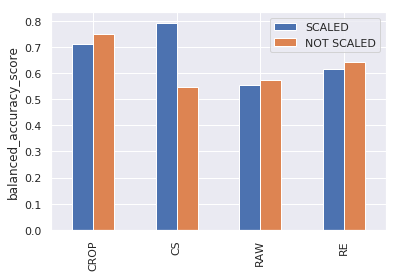

In [19]:
joint_results.plot.bar()
plt.ylabel(sklearn_metric.__name__)

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Your final answers to question 3:</a></b> Does rescaling always help? In which case does it help most?

In [20]:
# Put your answer to question 3 here
rescaling_always_help = 0 # 0 for false, 1 for true
varnum_rescaling_helps_most = 1 # num of var (0-based) for which perf. improve most after rescaling
case_num_rescaling_helps_most = 2 # num of case (0-based) for which perf. improve most after rescaling

# This is the checker code, keep it
question = 3
answer = (p_tr+s_tr+p_te+s_te)/10
answer += joint_results.sum().sum()/10-rescaling_always_help-case_num_rescaling_helps_most
score += check(answer, question)

-1.3145198580879243
-1.3145198580879243


## Step 2: Identify the best model
We are now ready to perform systematic experiments on various models. We will use the methods proposed in the variable `classifiers` of <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">these scikit-learn examples</a>, compare classifier performances on the dataset `CS_SCALED`:

### Question 4: Overfitting and underfitting

</b> There may be two reasons why a model performs poorly. It could either be <b>overfitting</b> or <b>underfitting</b> data. 

First you will perform these steps (with some help):

* Create a variable `data_df` and assign to it the data frame of the scaled version of the CS dataset.
* Create a variable `model_name` and a variable `model_list` containing the list of model names and the list of models (classifiers) from the <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">the scikit-learn examples</a> we pointed you to.
* Call `systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)` and display the results. 
* Find which method performs best. <b>Tip:</b> Use <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.idxmax.html#pandas.Series.idxmax">idxmax</a>.
* Find which models have TEST performance UNDER THE MEDIAN test performance. The single out models with TRAINING performance UNDER THE MEDIAN and those with TRAINING performance OVER THE MEDIAN.

Then answer those questions:
* If the test performance is bad but the training performance is good, is the model under-fitting or over-fitting? 
* If both are bad, is the model is under-fitting or over-fitting? 
* Which models are over-fitted and which ones are under-fitted?

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Choose the correct dataset: CS representation, scaled data.</b>

In [21]:
dataset_choice = 2
data_df = all_scaled_data_df[dataset_choice]

print(data_df.shape)

(491, 14581)


#### Classifier comparison
We import a bunch of classifiers, inspired 
by <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">that list</a>.

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model_name = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
model_list = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#### Systematic experiments:
We give you this code to make systematic experiments (run all models on the chosen representation). You may get a warning. What could explain it?

In [29]:
compar_results = systematic_model_experiment(data_df, model_name, model_list, sklearn_metric)
compar_results.round(2).style.background_gradient(cmap='Blues')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-

,perf_tr,std_tr,perf_te,std_te
Nearest Neighbors,0.7,0.03,0.56,0.02
Linear SVM,1,0,0.6,0.02
RBF SVM,1,0,0.5,0
Gaussian Process,1,0,0.5,0
Decision Tree,0.98,0.02,0.62,0.05
Random Forest,0.96,0.02,0.54,0.02
Neural Net,1,0,0.61,0.02
AdaBoost,1,0,0.62,0.02
Naive Bayes,0.78,0.04,0.6,0.04
QDA,1,0,0.5,0.03


<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Find the method performing best on test data.</b>

In [30]:
# Find the method performing best on test data
best_method = compar_results.perf_te.idxmax()
print("Best method: {}".format(best_method))

Best method: Decision Tree


#### Over-fitting and under-fitting
There may be two reasons why a model performs poorly. It could either be <b>over-fitting</b> or <b>under-fitting</b> data. Under-fitting means that the model is not powerful enough to even learn the training data while over-fitting means that the model is so powerful that it can learn super-well the training data, but it might not generalize well to new test data.

Of the models performing poorly (having TEST performance UNDER THE MEDIAN test performance), we highlight:
* models with TRAINING performance UNDER THE MEDIAN training performance (<b>under-fitted</b>)
* models with TRAINING performance OVER THE MEDIAN (<b>over-fitted</b>)

In [31]:
# We give you this code, check it in utilities.py of use ??analyze_model_experiments
analyze_model_experiments(compar_results)

,perf_tr,std_tr,perf_te,std_te,Overfitted,Underfitted
Nearest Neighbors,0.700473,0.0269495,0.555241,0.0244306,False,True
Linear SVM,1,0,0.596487,0.0189395,False,False
RBF SVM,1,0,0.5,0,True,False
Gaussian Process,1,0,0.5,0,True,False
Decision Tree,0.977276,0.0204,0.621106,0.0472655,False,False
Random Forest,0.963985,0.0183096,0.540684,0.020837,False,True
Neural Net,1,0,0.61483,0.0153303,False,False
AdaBoost,1,0,0.617938,0.0209223,False,False
Naive Bayes,0.777375,0.039541,0.598636,0.035198,False,False
QDA,1,0,0.502414,0.0338301,True,False


#### Bar graph comparing  results

Text(0, 0.5, 'balanced_accuracy_score')

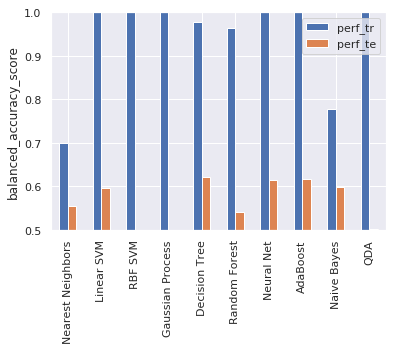

In [32]:
compar_results[['perf_tr', 'perf_te']].plot.bar()
plt.ylim(0.5, 1)
plt.ylabel(sklearn_metric.__name__)

<div style="background:#FFFFAA">
    Here you need to do something!
</div>
<b>Your final answers to question 4:</a> </b>Which methods overfits or underfit?</b>

In [33]:
# Put your answer to question 4 here
#If the test performance is bad but the training performance is good, is the model under-fitting or over-fitting?
answer1 = 0 # 0 for under-fitting and 1 for over-fitting
#If both are bad, is the model is under-fitting or over-fitting? 
answer2 = 1 # 0 for under-fitting and 1 for over-fitting
# Which models are over-fitted and which ones are under-fitted?
overfitted_list = [0,6,7]
underfitted_list = [4,9]

model_name = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

print("Over_fitted models:")
print([model_name[i] for i in overfitted_list])
print("Under_fitted models:")
print([model_name[i] for i in underfitted_list])
# This is the checker code, keep it
question = 4
answer = answer1-answer2+sum(overfitted_list)-sum(underfitted_list)+model_name.index(best_method)

score += check(answer, question)

Over_fitted models:
['Nearest Neighbors', 'Neural Net', 'AdaBoost']
Under_fitted models:
['Decision Tree', 'QDA']
3
3


###  Question 5: Dimensionality reduction
It is useful to reduce the data dimension (number of features) for two reasons: ease of visualisation and possibly increase in performance. Two approaches are possible:
1. Feature selection.
1. Feature transforms.

In the first case, one tries to select among the original features. In the second case, one first replaces the original features by "combinations" of features, then perform selection. Here we give two simple examples: Feature ranking with the <b>Pearson correlation</b> coefficient (as a feature selection method), and <b>Singular Value Decomposition</b> or SVD (as a feature transform method) .

In this section, we keep using the <b>CS scaled data</b>. We use as classifier the <b>3-nearest-neighbor</b> model, which seems to have served us well! We begin by showing you how to do simple feature selection, then we'll guide you step-by-step through SVD.

### Feature selection example
We perform feature selection with the Pearson correlation coefficient as follows:
* Compute the correlation matrix (we will only use the last column, i.e. correlation of features with the class label to be predicted)
* Sort the correlation coefficients (of features and class label)

#### Correlation matrix
If we did things right, `data_df` should contain the CS data. 

In [ ]:
corr = data_df.corr()
corr.round(1).style.background_gradient(cmap='coolwarm')

#### Sort features

Let us first sort all features by the <b>absolute value</b> of the Pearson correlation coefficient. Indeed, variables are informative no matter whether they are correlated or anti-correlated (since it suffices to multiply them by -1 to change the correlation direction).

In [ ]:
sval = corr['fruit'][:-1].abs().sort_values(ascending=False)
ranked_columns = sval.index.values
print(ranked_columns) 

We notice that the features that we have constructed in the previous lessons 'R-(G+B)/2' and 'W/H' come in the 5 top most informative features. But there are others. Let us make all scatter plots of pairs of features for the 5 top ranked features.

#### Visualize top 5 features with PAIRPLOT

In [ ]:
# Make a dataframe with only top five features
fruit_name = ['Banana', 'Apple']
fruit_list = [fruit_name[int((i+1)/2)] for i in data_df["fruit"].tolist()]
col_selected = ranked_columns[0:5]
df_5feat = pd.DataFrame.copy(data_df)
df_5feat = df_5feat[col_selected]
df_5feat['fruit'] = fruit_list
df_5feat.head()

In [ ]:
# Show pairplot
g = sns.pairplot(df_5feat, hue="fruit", markers=["o", "s"], diag_kind="hist")

#### Learning curves
We want to eveluate the effect of varying the number of features. To that end, we build learning curves = performance as a function of feature number.

In [ ]:
# We use the 3 nearest neighbor classifier to create the learnign curve
sklearn_model = KNeighborsClassifier(n_neighbors=3)
feat_lc_df = feature_learning_curve(data_df, sklearn_model, sklearn_metric)

In [ ]:
# Plot the learning curve
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_tr'], yerr=feat_lc_df['std_tr'], label='Training set')
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_te'], yerr=feat_lc_df['std_te'], label='Test set')
plt.xticks(np.arange(1, 22, 1)) 
plt.xlabel('Number of features')
plt.ylabel(sklearn_metric.__name__)
plt.legend(loc='lower right')

We see the, with 5 features, it is about as good as it gets, given the error bars.

### Singular Value Decomposition
Let us move now to the second way of reducing dimensionality: feature transforms.
When we use SVD, the feature transform consists in finding the "principal directions"(directions of largest variance). The method is also known as Pricipal Component Analysis (PCA). I simply used my search engine and typed the keywords "pandas svd". I found a nice tutorial on <a href="https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/">this page</a> and a step-by-step procedure on <a href="https://cmdlinetips.com/2019/05/singular-value-decomposition-svd-in-python/">this page</a>. 

We will guide you step-by-step:
* Create a dataframe called `df_scaled` containing the standardized columns, except the last one (tip: just use `drop` to eliminate the last column).
* Perform a singular value decomposition of `df_scaled` and call the resulting matrices u, s, v.
* Make a scree plot of the eigen values (square of the singular values). Save the plot in file 'svd_scree_plot.png'.
* Create a new dataframe `svd_df` with the two singular values as columns and the fruit type as index.
* Make pairwise scatter plots of the three first singular values.

Then the question to answer will be to compute the performances obtained with the 3 nearest neighbor method using the first 3 singular values.

<div style="background:#FFFFAA">
    Here you need to do something!
</div>

In [ ]:
# Make use the CS scaled dataset (this should be already loaded in data_df,
# if you did things correctly in previous questions)
# To obtain df_scaled, remove the last column of data_df.

df_scaled = data_df.drop(columns=['fruit'])

df_scaled.head()

#### Perform singular value decomposition

In [ ]:
u, s, v = np.linalg.svd(df_scaled, full_matrices=True)
print('U {}'.format(u.shape))
print('S {}'.format(s.shape))
print('V {}'.format(v.shape))

#### Make a scree plot
This plot allows us to decide how many components to keep, considering the total variance explained.

In [ ]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

We see that after 3 features there is a big drop in variance. So tentatively, let us keep the top three components.

#### Pairplot

In [ ]:
# Create a dataframe with only the three first principal components
fruit_name = ['Banana', 'Apple']
fruit_list = [fruit_name[int((i+1)/2)] for i in df["fruit"].tolist()]
fnum=3
labels= ['SV'+str(i) for i in range(1,fnum+1)]
df_3svd = pd.DataFrame(u[:,0:fnum], columns=labels)
df_3svd['fruit'] = fruit_list
df_3svd.head()

<div style="background:#FFFFAA">
    Here you need to do something!
</div>

In [ ]:
g = sns.pairplot(df_3svd, hue='fruit', markers=["o", "s"], diag_kind="hist")

#### Evaluate df_3svd: 
This piece of code will serve you later to answer question 5!

In [ ]:
# We use the function df_cross_validate that we already used in question 3 to evaluate svd_df
df_3svd['fruit'] = df.iloc[:, -1].to_numpy() # We replace the target values by numbers
p_tr, s_tr, p_te, s_te = df_cross_validate(df_3svd, sklearn_model, sklearn_metric)
metric_name = sklearn_metric.__name__.upper()
print("AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr, s_tr))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

#### SVD learning curve:

In [ ]:
# We compute the learning curve for the 3-nearest neighbor classifier ...
sklearn_model = KNeighborsClassifier(n_neighbors=3)
feat_lc_df = svd_learning_curve(data_df, sklearn_model, sklearn_metric)

# and we plot the learning curve
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_tr'], yerr=feat_lc_df['std_tr'], label='Training set')
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_te'], yerr=feat_lc_df['std_te'], label='Test set')
plt.xticks(np.arange(1, 22, 1)) 
plt.xlabel('Number of principal compoments')
plt.ylabel(sklearn_metric.__name__)
plt.legend(loc='lower right')

#### Comparison of dimensionality reduction methods 

Even though features 4 and 5 did not seem to explain a lot of additional variance, there seems to be an optimum at 4 or 5 features. Compare the performances of df_5feat and df_5svd (with 5 top components). Is one significantly better then the other?

<div style="background:#FFFFAA">
    Here you need to do something!
</div>

In [ ]:
fnum=5
labels= ['SV'+str(i) for i in range(1,fnum+1)]
df_5svd = pd.DataFrame(u[:,0:fnum], columns=labels) # Replace with the correct dataframe having 5 principal components

# Put here the code to compute the performances of df_5feat and df_5svd
df_5svd['fruit'] = df.iloc[:, -1].to_numpy() # Need numeric values
p_tr_5svd, s_tr_5svd, p_te_5svd, s_te_5svd = df_cross_validate(df_5svd, sklearn_model, sklearn_metric)
p_tr_5feat, s_tr_5feat, p_te_5feat, s_te_5feat = df_cross_validate(df_5feat, sklearn_model, sklearn_metric)

print("5FEAT AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr_5feat, s_tr_5feat))
print("5FEAT AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te_5feat, s_te_5feat))
print("5SVD AVERAGE TRAINING {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_tr_5svd, s_tr_5svd))
print("5SVD AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te_5svd, s_te_5svd))

In [ ]:
#Does one method give significantly better results than the other?
answer = 1 # One for yes and 0 for no

# This is the checker code, keep it
question = 5
answer = 0.001*(p_te_5feat-p_te_5svd)/(s_te_5feat+s_te_5svd)
score += check(answer, question)

In [ ]:
print('Your final score is %d / 5, congratulations!' % score)

<div style="background:#FFFFAA">
<span style="color:red">
<br>
    To finalize your homework:
<b>
<ul>
    <li> Use  Kernel + Restart and Run all.</li>
    <li> Save your notebook.</li>
    <li> Push your changes to your GitHub repo with:</li>
</ul>   
</b>
<pre>
git add .
git commit -m 'my homework is done'
git push
</pre>
<br>
</span>
</div>